Standard Gate

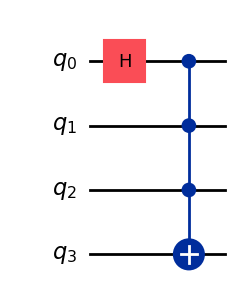

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
 
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

Simple calculation using Standard Gate:

{'1': 1000}


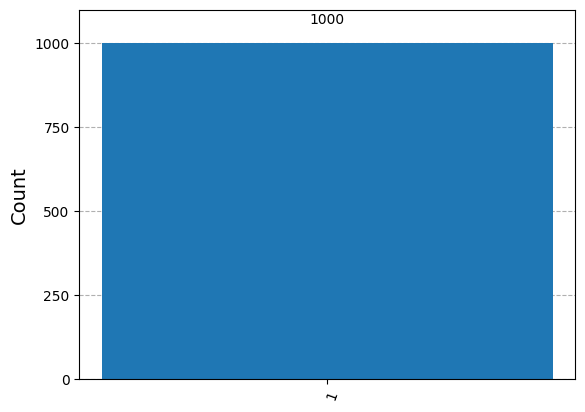

In [13]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize circuit with 4 qubits and 1 classical bit
qc = QuantumCircuit(4, 1)

# Set inputs (e.g., all conditions true: qubits 0, 1, 2 = |1⟩)
qc.x(0)  # Set qubit 0 to |1⟩  x basically means NOT
qc.x(1)  # Set qubit 1 to |1⟩
qc.x(2)  # Set qubit 2 to |1⟩

# Apply MCX gate (qubits 0, 1, 2 control; qubit 3 target)
mcx_gate = MCXGate(3)   # this is a multi-controlled X gate and only works f all the qubits are turned on.
qc.append(mcx_gate, [0, 1, 2, 3])

# Measure target qubit
qc.measure(3, 0)

# Simulate
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts(qc)
print(counts)

# Visualize
plot_histogram(counts)

{'1': 67}


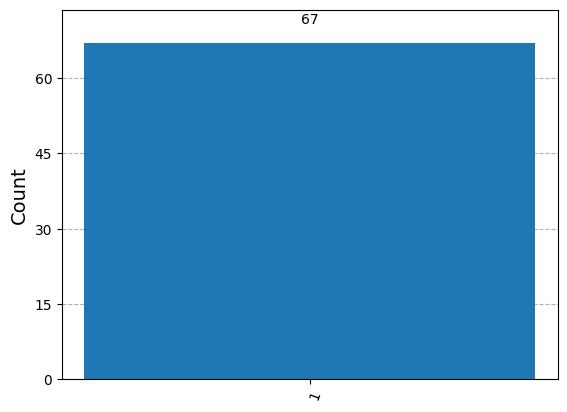

In [16]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Circuit with 1 qubit, 1 classical bit
qc = QuantumCircuit(1, 1)
qc.x(0)  # Flip qubit 0 to |1⟩
qc.measure(0, 0)  # Measure qubit 0

# Simulate
simulator = AerSimulator()
result = simulator.run(qc, shots=67).result()
counts = result.get_counts(qc)
print(counts)  # Expected: {'1': 1000}
plot_histogram(counts)

N-local Circuits

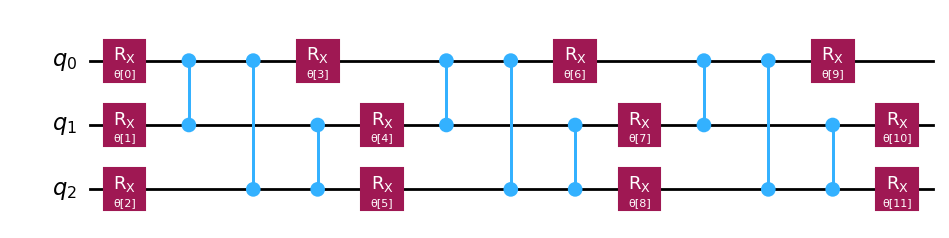

In [1]:
from qiskit.circuit.library import n_local
 
two_local = n_local(3, "rx", "cz")
two_local.draw("mpl")

Get a list-like object of the circuits parameters

In [2]:
two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

The parameters can be assigned real values using a dictionary, here each circuit is set to Zero, Zero.

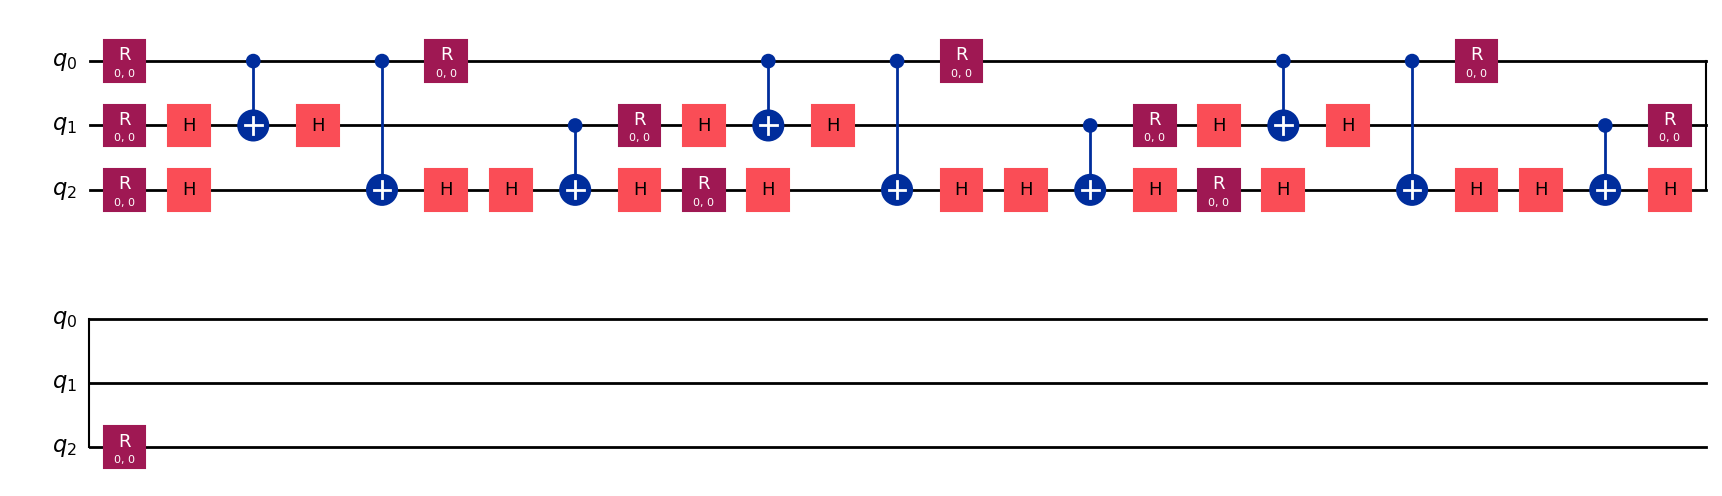

In [3]:
bound_circuit = two_local.assign_parameters(
    {p: 0 for p in two_local.parameters}
)
bound_circuit.decompose().draw("mpl")

Data-encoding circuits